# Segmentation Online Retail Store Customers
Segmentasi customers pada bisnis merupakan proses untuk memisahkan antar customer sesuai dengan behaviur atau tingkah lakunya pada saat melakukan transaksi. Segmentasi customer mempunyai banyak manfaat, salah satunya untuk membantu perusahaan dalam melakukan target marketing yang efektif. Dari analisis data akan menjawab pertanyaan berikut:
1. Bulan apa dengan penjualan terbaik?
2. Negara mana dengan penjualan terbanyak?
3. Produk apa yang sering dibeli?
4. Produk apa yang sedikit dibeli?
5. Customer mana dengan transaksi terbanyak (big spenders) dan yang sering berbelanja (loyal customer)?

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datadata.csv', encoding="ISO-8859-1", sep=',')

parameter encoding="ISO-8859-1" adalah untuk menkonversikan ke alfabet latin yang terdiri dari 191 karakter

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Ketika seseorang melakukan pembelian produk di retail store, data yang dapat diambil pada orang tersebut saat melakukan transaksi adalah:
1. InvoiceNo = Nomor struk pada saat melakukan transaksi
2. StockCode = Kode barang
3. Description = Nama Barang
4. Quantity = Banyaknya barang yang dibeli
5. InvoiceDate = Tanggal melakukan transaksi
6. UnitPrice = Harga satuan barang
7. CustomerID = Nomor ID customer
8. Country = Nama negara customer

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Terdapat angka minus di nilai terendah (min) pada Quantity dan UnitPrice

In [5]:
df.shape

(541909, 8)

## Mengecek duplicate values

In [6]:
df.duplicated().sum()

5268

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Terdapat angka negatif dalam nilai minimum di kolom UnitPrice dan Quantity 
Untuk melihat Produk apa saja yang terdapat angka negatif dapat dicek menggunakan kolom 'Description'

In [9]:
df.UnitPrice.describe()

count    536641.000000
mean          4.632656
std          97.233118
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [10]:
df[df.UnitPrice < 0].Description.value_counts()

Adjust bad debt    2
Name: Description, dtype: int64

Pada UnitPrice terdapat 2 baris yang terdapat nilai negatif, selanjutnya akan dilihat dimana saja terletak produknya

In [11]:
df.loc[df.UnitPrice < 0, ["Description"]]

,Description
299983,Adjust bad debt
299984,Adjust bad debt


In [12]:
df.Quantity.describe()

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [13]:
df[df.Quantity < 0].Description.value_counts()

Manual                             244
REGENCY CAKESTAND 3 TIER           180
POSTAGE                            126
check                              120
JAM MAKING SET WITH JARS            87
                                  ... 
SET 12 RETRO WHITE CHALK STICKS      1
PENS ASSORTED SPACEBALL              1
SWEET PUDDING STICKER SHEET          1
RED REFECTORY CLOCK                  1
KITCHEN METAL SIGN                   1
Name: Description, Length: 2110, dtype: int64

Melihat pada baris keberapa saja Quantity terdapat angka negatifnya

In [14]:
df.loc[df.Quantity < 0, ["Description"]]

,Description
141,Discount
154,SET OF 3 COLOURED FLYING DUCKS
235,PLASTERS IN TIN CIRCUS PARADE
236,PACK OF 12 PINK PAISLEY TISSUES
237,PACK OF 12 BLUE PAISLEY TISSUES
...,...
540449,ZINC T-LIGHT HOLDER STARS SMALL
541541,Manual
541715,VICTORIAN SEWING BOX LARGE
541716,HANGING HEART JAR T-LIGHT HOLDER


In [15]:
df.Quantity.head(144)

0       6
1       6
2       8
3       6
4       6
       ..
139    36
140    10
141    -1
142    12
143     8
Name: Quantity, Length: 144, dtype: int64

In [16]:
df.loc[df.Quantity < 0, ["InvoiceNo"]]

,InvoiceNo
141,C536379
154,C536383
235,C536391
236,C536391
237,C536391
...,...
540449,C581490
541541,C581499
541715,C581568
541716,C581569


Tanda negatif menunjukkan bahwa terdapat pembatalan order atau cancellation. Pada InvoiceNO diawali dengan 'C', dan pada quantity ditunjukan dengan tanda minus, kita harus menghapusnya karena terbaca sebagai outliers

In [17]:
df = df[df.Quantity > 0]

In [18]:
df.shape

(526054, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      526054 non-null object
StockCode      526054 non-null object
Description    525462 non-null object
Quantity       526054 non-null int64
InvoiceDate    526054 non-null object
UnitPrice      526054 non-null float64
CustomerID     392732 non-null float64
Country        526054 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


### Drop down the NaN rows

In [20]:
df.isna().sum()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [21]:
df = df.dropna(how='any')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df.shape

(392732, 8)

### Selanjutnya kita akan melihat apakah masih ada hidden string missing dalam kolom description

In [23]:
df.loc[df.Description.isnull()==False, "lowercase_descriptions"] = df.loc[df.Description.isnull()==False,"Description"].apply(lambda l: l.lower())

df.lowercase_descriptions.dropna().apply(lambda l: np.where("nan" in l, True, False)).value_counts()

False    392138
True        594
Name: lowercase_descriptions, dtype: int64

In [24]:
df.lowercase_descriptions.dropna().apply(lambda l: np.where("" == l, True, False)).value_counts()

False    392732
Name: lowercase_descriptions, dtype: int64

In [25]:
df = df.loc[(df.CustomerID.isnull()==False) & (df.lowercase_descriptions.isnull()==False)].copy()

In [26]:
df.isna().sum()

InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID                0
Country                   0
lowercase_descriptions    0
dtype: int64

In [27]:
df = df.drop(labels='lowercase_descriptions', axis='columns')

### Convert columns to the correct type of data

In [28]:
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [29]:
df.shape

(392732, 8)

### Convert "InvoiceDate" into datetime

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


Selanjutnya, membuat kolom 'Sales' untuk mengetahui penjualan yang dilakukan dengan cara mengkalikan kolom 'Quantity' dengan kolom 'UnitPrice'

In [32]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


### Pertanyaan 1. Bulan apa dengan penjualan terbaik?
Kita akan melihat bulan apa yang terbaik untuk penjualan. Pada kolom 'InvoiceDate' terdapat tanggal pada saat transaksi berlangsung, untuk menganalisis bulan apakah terjadinya transaksi terbanyak kita akan membuat kolom 'Month' yang terdiri dari bulan apa terjadinya transaksi.

In [33]:
sales = df.groupby('Month').sum()
sales

,Quantity,UnitPrice,CustomerID,Sales
Month,,,,
1,348522,66234.650,318108588.0,568101.310
2,265043,62619.480,301745554.0,446084.920
3,347623,87864.790,407885218.0,594081.760
4,291369,78543.481,342693435.0,468374.331
5,372948,101500.910,427293897.0,677355.150
6,363014,84602.660,412518212.0,660046.050
7,367372,75454.521,406813932.0,598962.901
8,398190,78877.090,408703500.0,644051.040
9,543654,118160.322,605219590.0,950690.202


Text(0, 0.5, 'Sales')

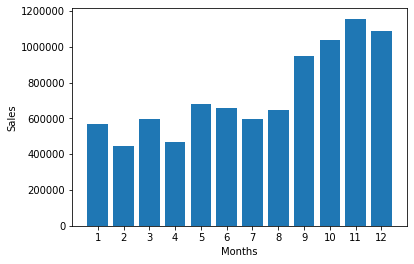

In [34]:
months = range(1,13)

plt.bar(months, sales['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')

Bulan November merupakan bulan dengan penjualan terbanyak. Mengapa hal ini terjadi? Mungkin karena, November merupakan bulan yang berdekatan dengan musim liburan natal sehingga banyak orang yang berbelanja untuk persiapan natal.

### Pertanyaan 2. Negara mana dengan penjualan terbanyak?

In [35]:
cty = df.groupby('Country').sum()
cty

,Quantity,UnitPrice,CustomerID,Month,Sales
Country,,,,,
Australia,84199,3.605750e+03,1.474610e+07,7172,1.384538e+05
Austria,4881,1.693900e+03,4.982601e+06,3034,1.019868e+04
Bahrain,260,7.895000e+01,2.100270e+05,85,5.484000e+02
Belgium,23237,7.372850e+03,2.524670e+07,15039,4.119634e+04
Brazil,356,1.426000e+02,4.086080e+05,128,1.143600e+03
Canada,2763,9.105800e+02,2.615483e+06,963,3.666380e+03
Channel Islands,9485,3.388000e+03,1.112340e+07,5072,2.044054e+04
Cyprus,6340,3.466150e+03,7.480720e+06,4370,1.350285e+04
Czech Republic,671,7.827000e+01,3.195250e+05,130,8.267400e+02


In [36]:
country = df['Country'].unique()
country

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

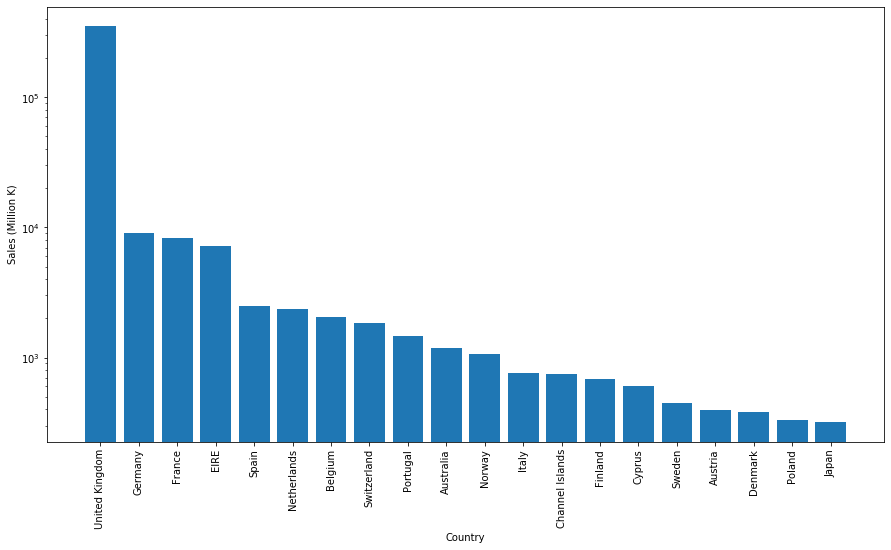

In [37]:
countries = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]

plt.bar(countries.index, countries.values)
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Sales (Million K)')
plt.gcf().set_size_inches(15, 8)
plt.yscale('log')
plt.show()

United Kingdom merupakan negara dengan penjualan terbanyak, dan diikuti oleh negara eropa lainnya. Mengingat online retail store ini memang berbasis di UK.

### Pertanyaan 3. Produk yang paling sering dibeli? 

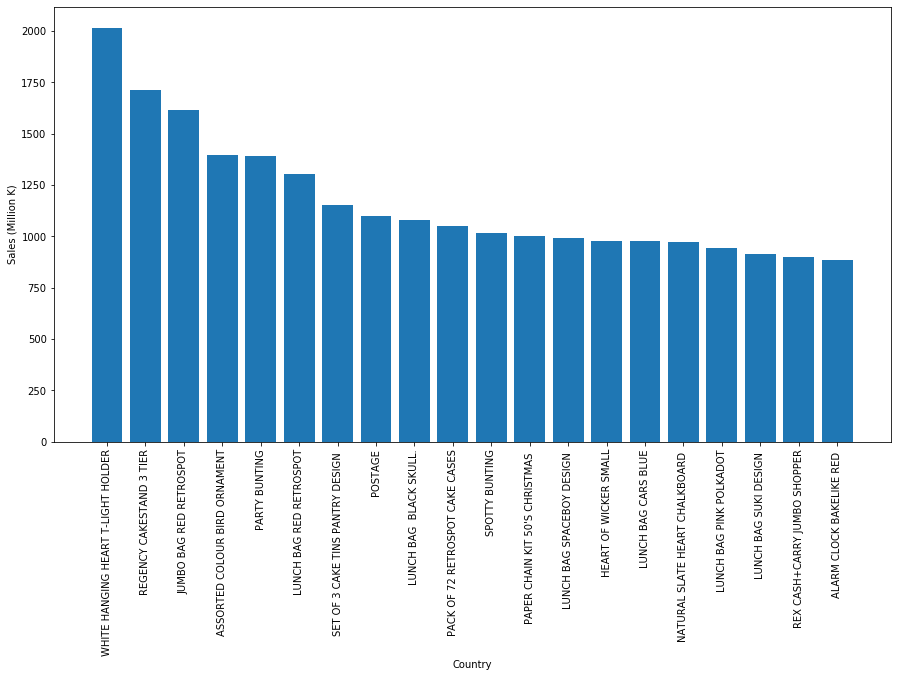

In [38]:
products = df.Description.value_counts().sort_values(ascending=False).iloc[0:20]

plt.bar(products.index, products.values)
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Sales (Million K)')
plt.gcf().set_size_inches(15, 8)
plt.show()

### Pertanyaan 4. Produk yang paling sedikit dibeli?
20 produk yang paling sedikit dibeli ini bisa dimasukkan ke dalam list produk yang akan discontinue karena mungkin produk tersebut kurang menarik atau kurang useful.

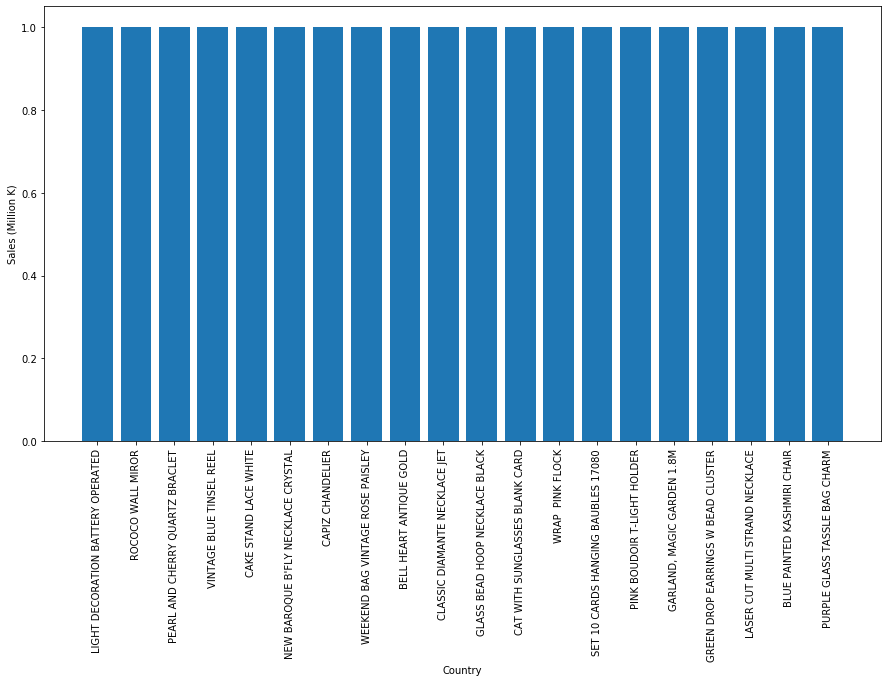

In [39]:
products = df.Description.value_counts().sort_values(ascending=False).iloc[-20:]

plt.bar(products.index, products.values)
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Sales (Million K)')
plt.gcf().set_size_inches(15, 8)
plt.show()

## Customer Segmentasi
Untuk mengsegmentasi agar dapat melihat customer dengan yang paling sering melakukan pembelian atau purchase di kolom Frequency, dan customer dengan pembelian terbanyak di kolom Sales. Dalam bisnis, validity yang sering digunakan yaitu Pareto Principle dimana 20% customers menciptakan 80% revenue.

In [40]:
freq = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
freq.columns = ['CustomerID','Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [41]:
sales_df = df.groupby(by='CustomerID',as_index=False).agg({'Sales': 'sum'})
sales_df.columns = ['CustomerID','Sales']
sales_df.head()

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [42]:
sales = freq.merge(sales_df, on='CustomerID')
sales.set_index('CustomerID',inplace=True)
sales.head()

,Frequency,Sales
CustomerID,,
12346.0,1,77183.60
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40


Pareto Principle dapat digunakan untuk melihat outcome yang dihasilkan dari faktor penting untuk kesuksesan perusahaan tersebut.

In [43]:
parreto = df['Sales'].sum()*0.8
print('The 80% of the revenue is: ', round(parreto,2))

The 80% of the revenue is:  7109767.12


In [44]:
sales['Rank'] = sales['Sales'].rank(ascending=False)
sales.head()

,Frequency,Sales,Rank
CustomerID,,,
12346.0,1,77183.60,10.0
12347.0,182,4310.00,335.0
12348.0,31,1797.24,1004.0
12349.0,73,1757.55,1027.0
12350.0,17,334.40,3097.0


In [45]:
sales.sort_values(by='Rank', ascending=True, inplace=True)
sales.head()

,Frequency,Sales,Rank
CustomerID,,,
14646.0,2080,280206.02,1.0
18102.0,431,259657.30,2.0
17450.0,336,194390.79,3.0
16446.0,3,168472.50,4.0
14911.0,5672,143711.17,5.0


In [46]:
pd.DataFrame(data=df['CustomerID'].nunique(),columns=['Count'], index=['Number of CustomerID'])

,Count
Number of CustomerID,4339


In [47]:
top20 = 4339 * 20/100
top20

867.8

In [48]:
# Jumlahkan nilai sales dengan customer dengan peringkat/rank <= 868
revenueByTop20 = sales[sales['Rank'] <= 868]['Sales'].sum()
revenueByTop20

6637300.820999999

In [49]:
quantile = sales.quantile(q=[.1,.25,.5,.75], axis=0)
quantile

,Frequency,Sales,Rank
0.10,7.0,155.146,434.8
0.25,17.0,306.455,1085.5
0.50,41.0,668.560,2170.0
0.75,98.0,1660.315,3254.5


In [50]:
quantile.to_dict()

{'Frequency': {0.1: 7.0, 0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Sales': {0.1: 155.146,
  0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315000000001},
 'Rank': {0.1: 434.8, 0.25: 1085.5, 0.5: 2170.0, 0.75: 3254.5}}

In [51]:
def FSalesScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [52]:
segment = sales
segment['F_Quartile'] = segment['Frequency'].apply(FSalesScore, args=('Frequency',quantile,))
segment['S_Quartile'] = segment['Sales'].apply(FSalesScore, args=('Sales',quantile,))

In [53]:
segment.head()

,Frequency,Sales,Rank,F_Quartile,S_Quartile
CustomerID,,,,,
14646.0,2080,280206.02,1.0,4,4
18102.0,431,259657.30,2.0,4,4
17450.0,336,194390.79,3.0,4,4
16446.0,3,168472.50,4.0,1,4
14911.0,5672,143711.17,5.0,4,4


In [54]:
segment['SalesScore'] = segment.S_Quartile.map(str)
segment['FreqScore'] = segment.F_Quartile.map(str)
segment.head()

,Frequency,Sales,Rank,F_Quartile,S_Quartile,SalesScore,FreqScore
CustomerID,,,,,,,
14646.0,2080,280206.02,1.0,4,4,4,4
18102.0,431,259657.30,2.0,4,4,4,4
17450.0,336,194390.79,3.0,4,4,4,4
16446.0,3,168472.50,4.0,1,4,4,1
14911.0,5672,143711.17,5.0,4,4,4,4


SalesScore = 4 adalah customer dengan pembelian terbanyak 

FreqScore = 4 adalah customer dengan purchase (seberapa sering customer beli di toko tersebut)

In [55]:
segment['FS_Score'] = segment.S_Quartile.map(str) + segment.F_Quartile.map(str)
segment.head()

,Frequency,Sales,Rank,F_Quartile,S_Quartile,SalesScore,FreqScore,FS_Score
CustomerID,,,,,,,,
14646.0,2080,280206.02,1.0,4,4,4,4,44
18102.0,431,259657.30,2.0,4,4,4,4,44
17450.0,336,194390.79,3.0,4,4,4,4,44
16446.0,3,168472.50,4.0,1,4,4,1,41
14911.0,5672,143711.17,5.0,4,4,4,4,44


In [56]:
segment[segment['FS_Score']=='44'].sort_values('Sales', ascending=False).head(10)

,Frequency,Sales,Rank,F_Quartile,S_Quartile,SalesScore,FreqScore,FS_Score
CustomerID,,,,,,,,
14646.0,2080,280206.02,1.0,4,4,4,4,44
18102.0,431,259657.30,2.0,4,4,4,4,44
17450.0,336,194390.79,3.0,4,4,4,4,44
14911.0,5672,143711.17,5.0,4,4,4,4,44
12415.0,716,124914.53,6.0,4,4,4,4,44
14156.0,1395,117210.08,7.0,4,4,4,4,44
17511.0,963,91062.38,8.0,4,4,4,4,44
16029.0,241,80850.84,9.0,4,4,4,4,44
16684.0,277,66653.56,11.0,4,4,4,4,44


In [57]:
sales_df = segment.drop(['Rank','F_Quartile','S_Quartile','SalesScore','FreqScore','FS_Score'], axis=1)
sales_df.head()                 

,Frequency,Sales
CustomerID,,
14646.0,2080,280206.02
18102.0,431,259657.30
17450.0,336,194390.79
16446.0,3,168472.50
14911.0,5672,143711.17


In [58]:
features = sales_df.columns

### Melihat distribusi data sebelum dilakukan Clustering

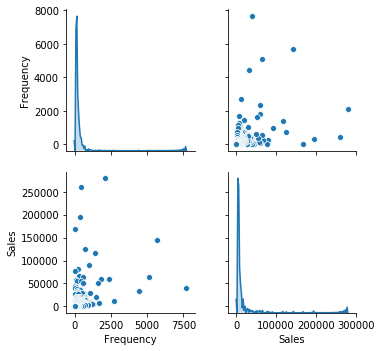

In [59]:
import seaborn as sns

sns.pairplot(sales_df, diag_kind='kde')

Terlihat distribusi diatas menghasilkan right skewed dan belum terdistribusi normal

In [60]:
from sklearn.preprocessing import PowerTransformer
pwt = PowerTransformer()
sales_df_new = pd.DataFrame(pwt.fit_transform(sales_df))

sales_df_new.columns = features
sales_df_new.head()

,Frequency,Sales
0,3.160994,3.878920
1,1.884249,3.840045
2,1.683250,3.690216
3,-1.874431,3.614932
4,3.979293,3.530336


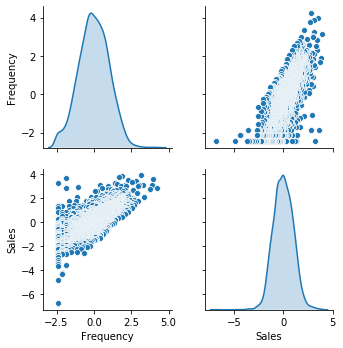

In [61]:
sns.pairplot(sales_df_new, diag_kind='kde')

Data sudah terdistribusi normal. Selanjutnya, data harus dilakukan standarisasi sebelum mengimplementasikan PCA

In [62]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sales_scaled = ss.fit_transform(sales_df_new)
sales_scaled

array([[ 3.16099445,  3.87892027],
       [ 1.88424867,  3.84004469],
       [ 1.68324991,  3.69021556],
       ...,
       [-2.103261  , -4.36528675],
       [-2.42536663, -4.84428488],
       [-2.42536663, -6.77903884]])

In [63]:
from sklearn.decomposition import PCA

pca = PCA()
pca_transformed = pca.fit_transform(sales_scaled)

In [64]:
df_pca = sales_scaled.copy()
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

In [65]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1
0,-4.977971,0.507650
1,-4.047687,1.382957
2,-3.799614,1.419139
3,-1.230720,3.881565
4,-5.310110,-0.317460


## Clustering menggunakan Kmeans

In [66]:
new_df = df_pca.copy()

In [67]:
from sklearn.cluster import KMeans

x_array = np.array(new_df)
print(x_array)

[[-4.97797144  0.50765021]
 [-4.04768665  1.38295663]
 [-3.79961387  1.41913902]
 ...
 [ 4.57395398 -1.59949374]
 [ 5.14041988 -1.7104335 ]
 [ 6.50849752 -3.07851114]]


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(new_df)
x_scaled

array([[0.02810301, 0.5087562 ],
       [0.10681658, 0.63293287],
       [0.1278066 , 0.63806594],
       ...,
       [0.83631375, 0.20982304],
       [0.88424375, 0.1940844 ],
       [1.        , 0.        ]])

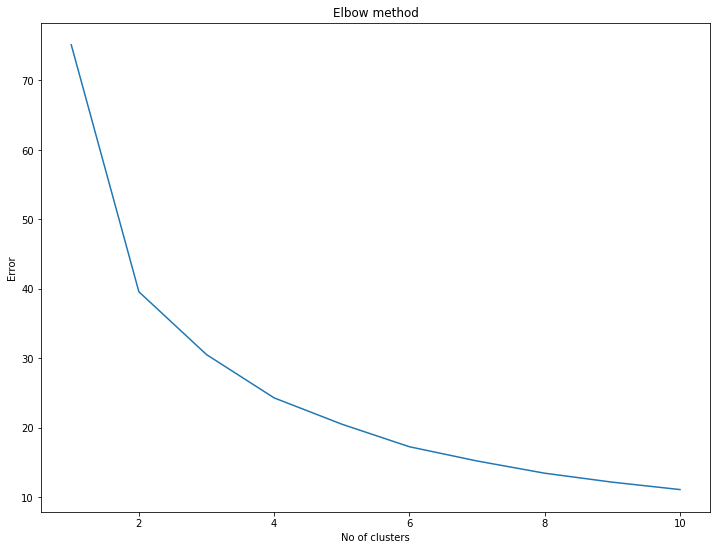

In [69]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x_scaled)
    kmeans.fit(x_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,9))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Lekukan berada pada angka 4, maka jumlah cluster paling optimal yaitu 4.

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(x_scaled)
labels = kmeans.predict(x_scaled)
centroids = kmeans.cluster_centers_

print('Centroid Values:')
print(centroids)

Centroid Values:
[[0.44756921 0.41657289]
 [0.4928927  0.57365445]
 [0.3107229  0.43617807]
 [0.58175556 0.42287173]]


In [71]:
# creating new column in df_pca dataframe for cluster number  
new_df['Cluster'] = labels
new_df.head()

,0,1,Cluster
0,-4.977971,0.507650,2
1,-4.047687,1.382957,2
2,-3.799614,1.419139,2
3,-1.230720,3.881565,1
4,-5.310110,-0.317460,2


In [72]:
new_df['Cluster'].value_counts()

0    1671
2    1174
3    1132
1     362
Name: Cluster, dtype: int64

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


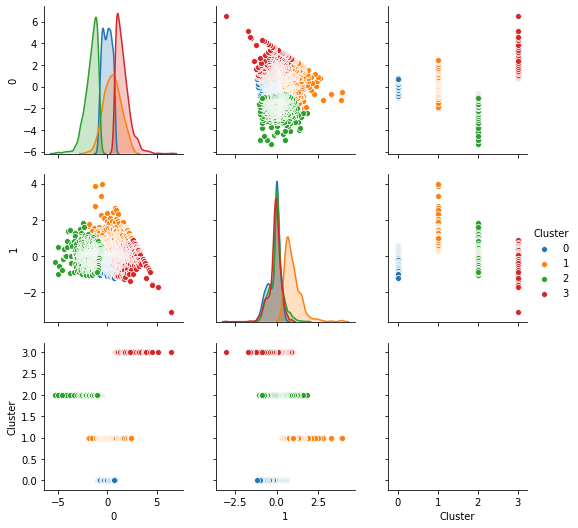

In [73]:
sns.pairplot(new_df,diag_kind='kde',hue='Cluster')

In [74]:
customers_grouped = pd.DataFrame(pwt.fit_transform(sales_df),columns=sales_df.columns,index=sales_df.index)
customers_grouped['Cluster'] = new_df['Cluster'].values
customers_grouped['FS_Score'] = segment['FS_Score'].values
customers_grouped.head()

,Frequency,Sales,Cluster,FS_Score
CustomerID,,,,
14646.0,3.160994,3.878920,2,44
18102.0,1.884249,3.840045,2,44
17450.0,1.683250,3.690216,2,44
16446.0,-1.874431,3.614932,1,41
14911.0,3.979293,3.530336,2,44


### Pertanyaan 5. Customer mana dengan transaksi terbanyak (big spenders) dan customer yang sering berbelanja (most frequent customer)?

In [75]:
frequent_spenders_customer = customers_grouped[(customers_grouped['FS_Score'] == '44') ]
frequent_spenders_customer

,Frequency,Sales,Cluster,FS_Score
CustomerID,,,,
14646.0,3.160994,3.878920,2,44
18102.0,1.884249,3.840045,2,44
17450.0,1.683250,3.690216,2,44
14911.0,3.979293,3.530336,2,44
12415.0,2.294884,3.454891,2,44
...,...,...,...,...
12635.0,0.718549,0.702391,2,44
15549.0,0.815189,0.698958,2,44
13184.0,1.176499,0.693360,2,44


Setelah mengetahui siapa saja customer dengan transaksi terbanyak dan customer yang sering berbelanja, kita dapat me-reward mereka dengan beberapa loyalty programs. Loyalty program ini bertujuan untuk membuat customer mendapatkan pengalaman yang menyenangkan saat berbelanja dan mendorong mereka untuk kembali berbelanja lagi. Program yang dapat digunakan adalah dengan cara memberi cashback (biasanya 10-30%) ketika customer sudah mencapai batas ketentuan pembelian.

## Klasifikasi Naive bayes
Setelah mengclusterkan dataset, kita akan mengecek apakah dataset masuk ke dalam cluster yang tepat. Menggunakan algoritma naive bayes yang dapat melihat seberapa besar peluang suatu data yang masuk kelas tertentu.

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [77]:
y = new_df['Cluster']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, stratify=y)

In [79]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [82]:
y_pred = gnb.predict(X_test)
y_score = accuracy_score(y_pred, y_test)
y_score

1.0

Akurasi yang didapat sebesar 100% yang berarti proses cluster yang dibuat sudah tepat

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       227

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



Pengukuran menggunakan precision berguna untuk mengukur ketepatan model algoritma untuk mengklasifikasikan data, kemudian dicek kembali oleh recall, dan dari kedua pengukuran tersebut diambil rata-ratanya dengan menggunakan f1-score. Hasil diatas menunjukan bahwa proses clustering yang dibuat sudah tepat, sehingga klasifikasi yang dilakukan dengan Naive Bayes menghasilkan pengukuran sebesar 100%.